# 과적합 피하기 - 초음파 광물 데이터

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

* 데이터 전처리

In [8]:
from google.colab import files
up = files.upload()
filename = list(up.keys())[0]
filename

Saving sonar.csv to sonar.csv


'sonar.csv'

In [9]:
df = pd.read_csv(filename, header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R


In [10]:
np.unique(df.values[:, -1], return_counts=True)

(array(['M', 'R'], dtype=object), array([111,  97]))

In [11]:
# X data : scaling
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(df.iloc[:, :-1].values)

In [12]:
# Y data : label encoding
from sklearn.preprocessing import LabelEncoder
y_labeled = LabelEncoder().fit_transform(df.iloc[:, -1].values)

In [13]:
# df.values[:, :-1]

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [16]:
# type(df.iloc[:, :-1].values[0][0])

numpy.float64

In [18]:
# numpy의 경우 배열 안의 모든 데이터의 타입이 동일해진다
# 따라서 df.values[:, :-1]로 할 경우 먼저 df.values로 변환하는 과정에서 모든 데이터가 object로 된다
# 머신러닝의 경우 숫자가 입력되어야 하므로 df.iloc[:, :-1]로 입력해야한다.

np.array([1, 2, 'r'])

array(['1', '2', 'r'], dtype='<U21')

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_labeled, stratify = y_labeled, test_size=0.2, random_state=seed
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 60), (42, 60), (166,), (42,))

### 모델 정의/설정/학습/평가

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#### 1. 은닉층 : 2개

In [28]:
model1 = Sequential([
                     Dense(80, input_dim=60, activation='relu'),
                     Dense(12, activation='relu'),
                     Dense(1, activation='sigmoid')
])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 80)                4880      
                                                                 
 dense_14 (Dense)            (None, 12)                972       
                                                                 
 dense_15 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [29]:
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
h1 = model1.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=200, verbose=0)

In [30]:
model1.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.4730 - accuracy: 0.8333


[0.4729958474636078, 0.8333333134651184]

#### 2. 은닉층 : 4개

In [31]:
model2 = Sequential([
                     Dense(64, input_dim=60, activation='relu'),
                     Dense(30, activation='relu'),
                     Dense(12, activation='relu'),
                     Dense(4, activation='relu'),
                     Dense(1, activation='sigmoid')
])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                3904      
                                                                 
 dense_17 (Dense)            (None, 30)                1950      
                                                                 
 dense_18 (Dense)            (None, 12)                372       
                                                                 
 dense_19 (Dense)            (None, 4)                 52        
                                                                 
 dense_20 (Dense)            (None, 1)                 5         
                                                                 
Total params: 6,283
Trainable params: 6,283
Non-trainable params: 0
_________________________________________________________________


In [32]:
model2.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
h2 = model2.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=200, verbose=0)
model2.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.6818 - accuracy: 0.8571


[0.6817505359649658, 0.8571428656578064]

#### 3. 은닉층 : 6개

In [37]:
model3 = Sequential([
                     Dense(64, input_dim=60, activation='relu'),
                     Dense(40, activation='relu'),
                     Dense(28, activation='relu'),
                     Dense(16, activation='relu'),
                     Dense(8, activation='relu'),
                     Dense(4, activation='relu'),
                     Dense(1, activation='sigmoid')
])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                3904      
                                                                 
 dense_29 (Dense)            (None, 40)                2600      
                                                                 
 dense_30 (Dense)            (None, 28)                1148      
                                                                 
 dense_31 (Dense)            (None, 16)                464       
                                                                 
 dense_32 (Dense)            (None, 8)                 136       
                                                                 
 dense_33 (Dense)            (None, 4)                 36        
                                                                 
 dense_34 (Dense)            (None, 1)                

In [38]:
model3.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
h3 = model3.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=200, verbose=0)
model3.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.9082 - accuracy: 0.8333


[0.9081883430480957, 0.8333333134651184]

* model1을 그대로 사용하는데, epoch횟수를 늘린다

In [39]:
model = Sequential([
                     Dense(80, input_dim=60, activation='relu'),
                     Dense(12, activation='relu'),
                     Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 80)                4880      
                                                                 
 dense_36 (Dense)            (None, 12)                972       
                                                                 
 dense_37 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
h0 = model.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=1000)

In [41]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.8061 - accuracy: 0.8333


[0.8061003684997559, 0.8333333134651184]

시각화

In [46]:
y_acc = h0.history['accuracy'][:200]
y_vloss = h0.history['val_loss'][:200]
xs = np.arange(1, len(y_acc)+1)

In [47]:
import matplotlib.pyplot as plt


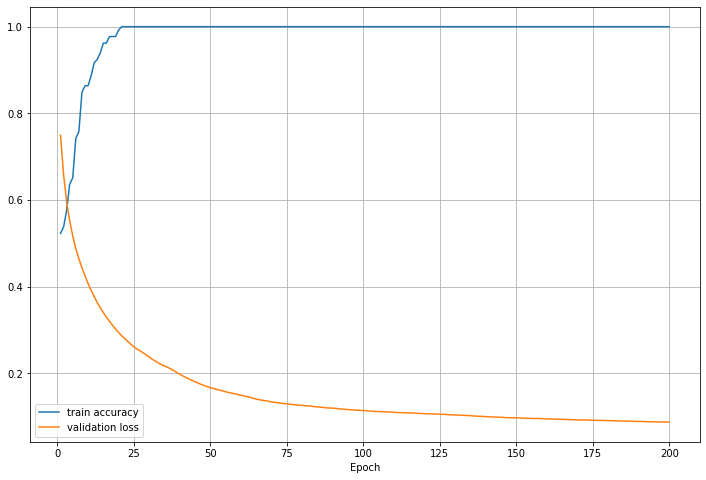

In [48]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

* 모델 저장조건 설정

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [51]:
import os
if not os.path.exists('model'):
    os.mkdir('model')

In [53]:
model_path = 'model/sonar.h5'
checkpoint = ModelCheckpoint(
    model_path, monitor = 'val_loss', verbose = 0, save_best_only = True
)

In [61]:
model = Sequential([
                     Dense(80, input_dim=60, activation='relu'),
                     Dense(12, activation='relu'),
                     Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 80)                4880      
                                                                 
 dense_42 (Dense)            (None, 12)                972       
                                                                 
 dense_43 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=400,
                 verbose = 0, callbacks = [checkpoint])

# epoch가 끝나면 callback을 한 번 실행한다

In [63]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

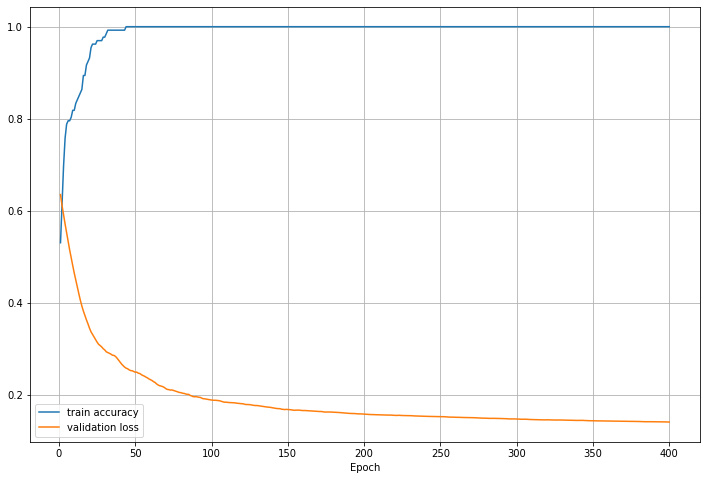

In [64]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [65]:
from tensorflow.keras.models import load_model
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

# val_loss가 가장 낮은 지점에서의 모델이 저장된다.

2/2 [==============================] - 0s 7ms/step - loss: 0.6554 - accuracy: 0.8095


[0.6554276347160339, 0.8095238208770752]

* 조기 종료시점 설정

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience = 30)

In [67]:
model = Sequential([
                     Dense(80, input_dim=60, activation='relu'),
                     Dense(12, activation='relu'),
                     Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 80)                4880      
                                                                 
 dense_45 (Dense)            (None, 12)                972       
                                                                 
 dense_46 (Dense)            (None, 1)                 13        
                                                                 
Total params: 5,865
Trainable params: 5,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
hist = model.fit(
    X_train, y_train, validation_split=0.2, batch_size=50, epochs=400,
    verbose = 1, callbacks = [checkpoint, early_stopping])

In [69]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

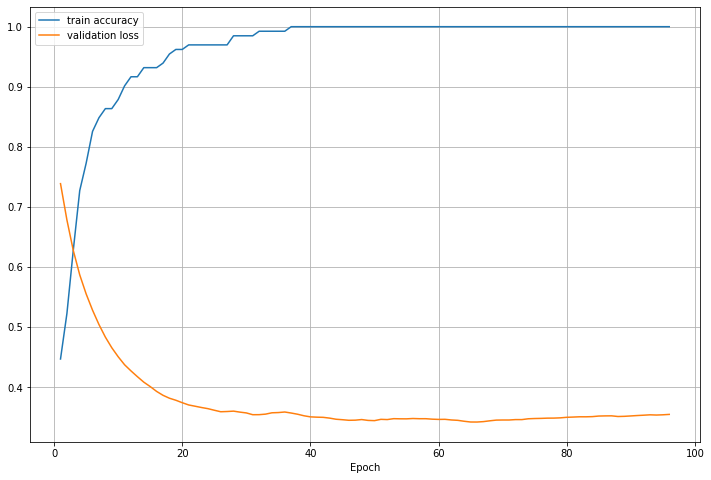

In [70]:
plt.figure(figsize=(12, 8))
plt.plot(xs, y_acc, ms=5, label='train accuracy')
plt.plot(xs, y_vloss, ms=5, label = 'validation loss')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.show()

In [71]:
best_model = load_model(model_path)
best_model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.6554 - accuracy: 0.8095


[0.6554276347160339, 0.8095238208770752]